In [24]:
################################################## Imports-KNN ##################################################
from __future__ import division, print_function, unicode_literals
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap #Imports a specific function that allows custom color maps to be created for plots
import numpy as np

################################################## Load Data-KNN ##################################################
from sklearn import neighbors           # Imports the neighbors and datasets modules from the scikit-learn library
                                        # The neighbors module contains the kNN implementation
import pandas as pd   
# import cancer datasets
df = pd.read_csv("/Users/shaonan/Desktop/EmoryMSBA2024/672_Intro_to_BA/HW2_Group/wdbc.data.txt", header = None)


In [87]:
# Define the base features
base_features = [
    "radius", 
    "texture", 
    "perimeter", 
    "area", 
    "smoothness", 
    "compactness", 
    "concavity", 
    "concave points", 
    "symmetry", 
    "fractal dimension"
]

# Define the computations
computations = ["Mean", "SE", "Worst"]

# Create the header list
headers = ["ID number", "Diagnosis"]

# Append computed features to the headers
for computation in computations:
    for feature in base_features:
        headers.append(f"{computation} {feature}")

headers

df.columns = headers

df.head()

# Retrieve features/attributes of dataset iris
X = df.iloc[:, 2:32]

# Retrieve target variable of dataset
y= df.iloc[:,1]

     ID number  Diagnosis  Mean radius  Mean texture  Mean perimeter  \
0       842302          1        17.99         10.38          122.80   
1       842517          1        20.57         17.77          132.90   
2     84300903          1        19.69         21.25          130.00   
3     84348301          1        11.42         20.38           77.58   
4     84358402          1        20.29         14.34          135.10   
..         ...        ...          ...           ...             ...   
564     926424          1        21.56         22.39          142.00   
565     926682          1        20.13         28.25          131.20   
566     926954          1        16.60         28.08          108.30   
567     927241          1        20.60         29.33          140.10   
568      92751          0         7.76         24.54           47.92   

     Mean area  Mean smoothness  Mean compactness  Mean concavity  \
0       1001.0          0.11840           0.27760         0.30010 

In [61]:
# Report summary statistics for the dataset
summary_statistics = df.describe()

summary_statistics

,ID number,Mean radius,Mean texture,Mean perimeter,Mean area,Mean smoothness,Mean compactness,Mean concavity,Mean concave points,Mean symmetry,...,Worst radius,Worst texture,Worst perimeter,Worst area,Worst smoothness,Worst compactness,Worst concavity,Worst concave points,Worst symmetry,Worst fractal dimension
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


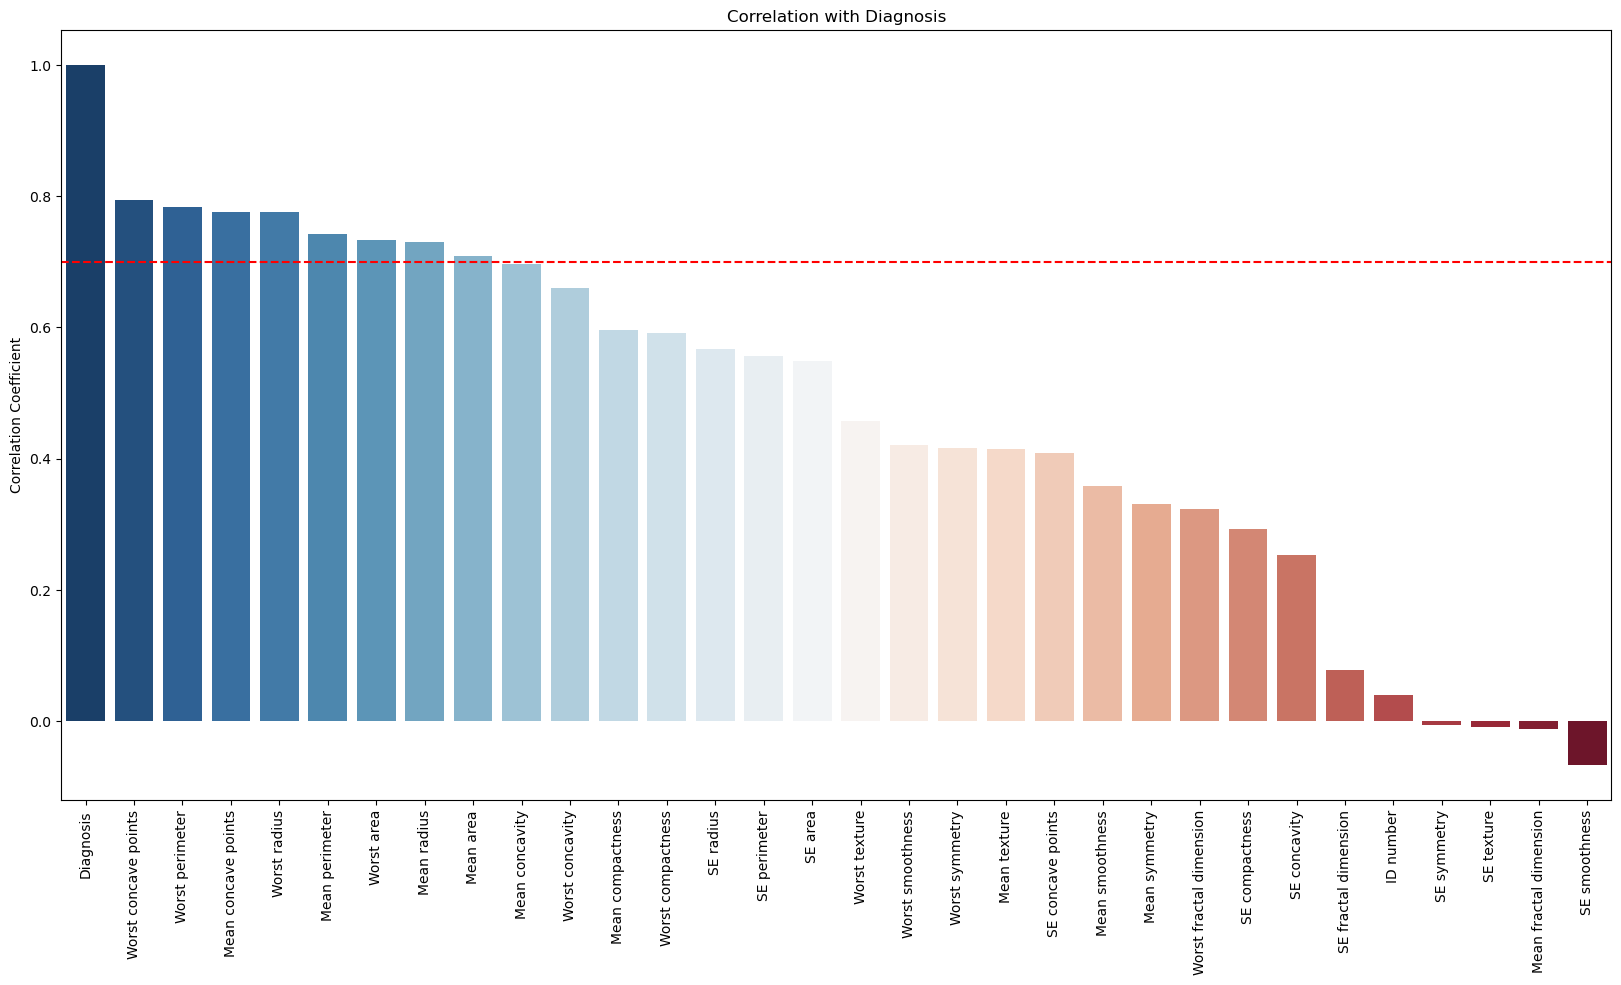

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation of all columns with each other
full_correlation_matrix = df.corr()

# Select the 'Diagnosis' row or column from the full correlation matrix
correlation_with_diagnosis = full_correlation_matrix['Diagnosis'].sort_values(ascending=False)

# Plotting
plt.figure(figsize=(20, 10))
sns.barplot(x=correlation_with_diagnosis.index, y=correlation_with_diagnosis.values, palette="RdBu_r")

# Add a horizontal line at y=0.7
plt.axhline(y=0.7, color='r', linestyle='--')

plt.title("Correlation with Diagnosis")
plt.xticks(rotation=90)
plt.ylabel('Correlation Coefficient')
plt.show()


In [108]:
# SPLIT + NORMALIZATION + looking for missing values

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# 1.1 Handling missing values
# For this dataset, there aren't any missing values. But let's check to be sure.
missing_values = df.isnull().sum()

# 1.2 Convert Categorical to Numerical
encoder = LabelEncoder()
df['Diagnosis'] = encoder.fit_transform(df['Diagnosis'])  # M will be 1 and B will be 0

correlation_with_diagnosis = df.corr()['Diagnosis']
columns_to_drop = correlation_with_diagnosis[correlation_with_diagnosis.abs() > 0.7].index.drop('Diagnosis')
df.drop(columns_to_drop, axis=1, inplace=True)

# 1.3 Split Data
X = df.iloc[:, 2:].values  # Features (excluding ID and Diagnosis)
y = df['Diagnosis'].values  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 1.4 Standardize Features
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

missing_values


ID number                  0
Diagnosis                  0
Mean radius                0
Mean texture               0
Mean perimeter             0
Mean area                  0
Mean smoothness            0
Mean compactness           0
Mean concavity             0
Mean concave points        0
Mean symmetry              0
Mean fractal dimension     0
SE radius                  0
SE texture                 0
SE perimeter               0
SE area                    0
SE smoothness              0
SE compactness             0
SE concavity               0
SE concave points          0
SE symmetry                0
SE fractal dimension       0
Worst radius               0
Worst texture              0
Worst perimeter            0
Worst area                 0
Worst smoothness           0
Worst compactness          0
Worst concavity            0
Worst concave points       0
Worst symmetry             0
Worst fractal dimension    0
dtype: int64

In [109]:
########################################## Distribution Target Variable ##########################################

# Count how many data points we have for each label of the target variable
print('Labels counts in y:', np.bincount(y))             # The bincount function from the numpy library counts the number of occurrences of each value in the input array.
                                                         # Counts how many samples belong to each class in the target variable y (the original dataset before splitting).
print('Labels counts in y_train:', np.bincount(y_train)) # Counts the occurrences of each class in the training subset (y_train) of the target variable.
print('Labels counts in y_test:', np.bincount(y_test)) 

Labels counts in y: [357 212]
Labels counts in y_train: [250 148]
Labels counts in y_test: [107  64]


In [110]:
############################################# Train the Model #############################################

# Import the Necessary Library
from sklearn import neighbors  

# Setting up the kNN Classifier
# Code initializes a kNN classifier with specific parameters
knn = neighbors.KNeighborsClassifier(n_neighbors=3,         # n_neighbors is the k in the kNN
                                     p=2,                   # power parameter for the Minkowski metric.
                                     metric='minkowski',    # the default metric is minkowski, which is a generalization of the Euclidean distance
                                                            # with p=2 is equivalent to the standard Euclidean distance.
                                                            # with p=1 is equivalent to the Mahattan distance.
                                     n_jobs=-1,             # the number of parallel jobs to run for neighbors search; -1 means using all processors
                                     
                                     weights='uniform')     # all points in each neighborhood are weighted equally (default). We would choose 'distance' if
                                                            # we wanted to apply a similarity-moderated kNN
# Train the model
knn = knn.fit(X_train_std, y_train)

In [111]:
############################################# Evaluate the Model #############################################
from sklearn.metrics import accuracy_score, f1_score, cohen_kappa_score, classification_report #The required functions for evaluation metrics are imported

# Estimate the predicted values by applying the kNN algorithm
y_pred = knn.predict(X_test_std)            # make predictions for test set
                                            # The classifier (knn) makes predictions on the standardized test data
y_pred_insample = knn.predict(X_train_std)  # make predictions for train set (for educational purposes, to demonstrate the difference)
                                            # The classifier (knn) makes predictions on the standardized train data


/Users/shaonan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/shaonan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no long

In [115]:
############################################# Evaluate the Model #############################################
from sklearn.metrics import accuracy_score, f1_score, cohen_kappa_score, classification_report #The required functions for evaluation metrics are imported

# Estimate the predicted values by applying the kNN algorithm
y_pred = knn.predict(X_test_std)            # make predictions for test set
                                            # The classifier (knn) makes predictions on the standardized test data
y_pred_insample = knn.predict(X_train_std)  # make predictions for train set (for educational purposes, to demonstrate the difference)
                                            # The classifier (knn) makes predictions on the standardized train data

# Accuracy
print('Accuracy (out-of-sample): %.2f' % accuracy_score(y_test, y_pred))        # Accuracy is calculated and printed for both the test (out-of-sample) dataset.
print('Accuracy (in-sample): %.2f' % accuracy_score(y_train, y_pred_insample))  # Accuracy is calculated and printed for both the training (in-sample) dataset.

# F1 score
# The F1 score is a harmonic mean of precision and recall, providing a balance between the two metrics
print('F1 score (out-of-sample): ', f1_score(y_test, y_pred, average='macro'))           # average='macro' calculate metrics for each label, and find their unweighted mean
print('F1 score (in-sample)    : ', f1_score(y_train, y_pred_insample, average='macro')) # The average='macro' argument calculates the metric independently for each class and then takes the average, not considering label imbalance.

# Kappa score
# Cohen's Kappa score measures the agreement between the predictions and the actual values, accounting for the possibility of agreement occurring by chance
# It's especially useful when the classes are imbalanced
print('Kappa score (out-of-sample): ', cohen_kappa_score(y_test, y_pred))                # computes Cohen’s kappa: a statistic that measures inter-annotator agreement
print('Kappa score (in-sample)    : ', cohen_kappa_score(y_train, y_pred_insample))      # (i.e., agreement between predictions and actual values of target variables)

# Build a text report showing the main classification metrics (out-of-sample performance)
# classification_report function provides a comprehensive report displaying key metrics

target_names = np.unique(y_test).astype(str).tolist()

print(classification_report(y_test, y_pred, target_names=target_names))          # builds a text report showing the main classification metrics (precision, recall, f1-score)
                                                                         # The target_names argument provides names for each of the classes

Accuracy (out-of-sample): 0.95
Accuracy (in-sample): 0.98
F1 score (out-of-sample):  0.9490312965722801
F1 score (in-sample)    :  0.9757637267837207
Kappa score (out-of-sample):  0.898199136776306
Kappa score (in-sample)    :  0.9515277815367128
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       107
           1       0.98      0.89      0.93        64

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



/Users/shaonan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/shaonan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no long

In [89]:
######################################### Logistic Regression ###############################

from __future__ import division, print_function, unicode_literals

# Import necessary libraries and modules
# Matplotlib inline allows the output of plotting commands will be displayed inline (within the notebook)
%matplotlib inline
from sklearn.datasets import load_iris  # iris dataset
                                        # imports the load_iris function from the sklearn.datasets module
from sklearn import linear_model        # the sklearn.linear_model module implements generalized linear models.


from sklearn.model_selection import train_test_split # splits arrays or matrices into random train and test subsets
from sklearn.metrics import accuracy_score, f1_score, classification_report # the sklearn.metrics module includes performance metrics

############################################    Split the Data   ############################################

# Split validation
# train_test_split is used to split the dataset into training (X_train, y_train) and testing (X_test, y_test) subsets
X_train, X_test, y_train, y_test = train_test_split(X,  # dataset to be split ; X represents the feature matrix
                                                    y,  # dataset to be split ; y represents the target variable

                                                    test_size=0.4,  # a float number between 0.0 and 1.0 representing the proportion of the dataset to include in the test split
                                                                    # test_size=0.4 specifies that 40% of the data will be used for testing, and the remaining 60% for training
                                                    random_state=1, # controls the shuffling for reproducible output

                                                    stratify=y) 

In [90]:
from sklearn.linear_model import LogisticRegression

clf = linear_model.LogisticRegression(multi_class = 'auto', C=1e5, solver = 'lbfgs', max_iter=100)

In [91]:


clf = clf.fit(X_train, y_train)                             # model induction using the train data

print('The weights of the attributes are:', clf.coef_)      # reports coefficients of the features in the decision function
                                                            # the coefficients in clf.coef_ are printed in the same order as the columns of the input feature matrix X
                                                            # these coefficients represent the weight or importance of each feature in the logistic regression model's decision function
print('The weights of the intercepts are:', clf.intercept_) # reports intercepts in the decision function


The weights of the attributes are: [[-3.52934663 -0.09482721  0.58631845 -0.0246688   0.13048482  0.64178528
   0.8910687   0.37953675  0.17469563  0.04902986 -0.11077869 -1.58405815
   0.13606778  0.11972166  0.01855867  0.13044177  0.18841705  0.05151257
   0.06434593  0.01356018 -3.33077087  0.30646393  0.12944361  0.05161542
   0.23831075  1.87744164  2.36375563  0.69796482  0.70934228  0.19373244]]
The weights of the intercepts are: [-0.58020583]


/Users/shaonan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [92]:
#################################### Apply the Logistic Regression Model ####################################

# We now apply the trained logistic regression model to the test set
y_pred = clf.predict(X_test)             # generate classification prediction and store them in y_pred
                                         # in scikit-learn's LogisticRegression the default threshold for the .predict() method is 0.5
y_pred_prob = clf.predict_proba(X_test)  # estimate class probabilities

# Print the first elements of the arrays containing predictions, predicted class probabilities,
# and the sum of predicted probabilities for the first test sample
print('The predictions are:', y_pred[0], y_pred_prob[0], np.sum(y_pred_prob[0])) # prints first elements of arrays

################################### Evaluate the Logistic Regression Model ##################################

# Build a text report showing the main classification metrics (out-of-sample performance)
print(classification_report(y_test, y_pred, target_names=target_names)) # builds a text report showing the main classification metrics
                                                                             # (such as precision, recall, f1-score)


The predictions are: 0 [9.99420623e-01 5.79377094e-04] 1.0
              precision    recall  f1-score   support

           B       0.96      0.96      0.96       143
           M       0.93      0.93      0.93        85

    accuracy                           0.95       228
   macro avg       0.94      0.94      0.94       228
weighted avg       0.95      0.95      0.95       228



Confusion matrix, without normalization
[[106   1]
 [  7  57]]
Normalized confusion matrix
[[0.99 0.01]
 [0.11 0.89]]


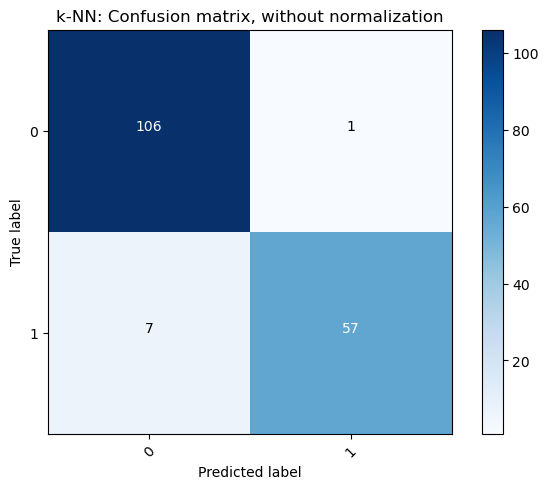

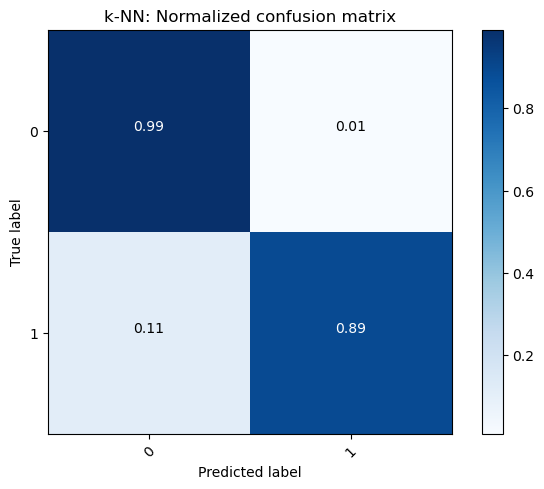

In [124]:
# confusion matrix 
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # devide absolute number of observations with sum across columns to get the relative percentage of observations
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)         
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))                 
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'                          
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),                              
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix to evaluate the accuracy of a classification
cnf_matrix = confusion_matrix(y_test, y_pred)
#Determine the way floating point numbers are displayed
np.set_printoptions(precision=2)                             
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix,
                      classes= np.unique(y_test).astype(str).tolist(),
                      title='k-NN: Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix,
                      classes=np.unique(y_train).astype(str).tolist(),
                      normalize=True,
                      title='k-NN: Normalized confusion matrix')

plt.show()

Confusion matrix, without normalization
[[107   0]
 [  6  58]]
Normalized confusion matrix
[[1.   0.  ]
 [0.09 0.91]]


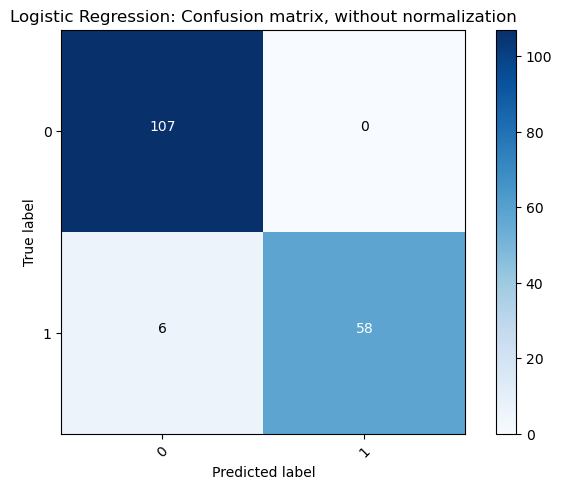

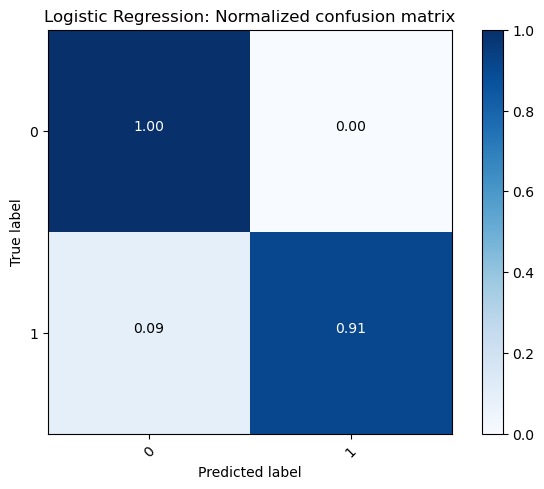

In [123]:
from sklearn.linear_model import LogisticRegression

# Train the logistic regression model
log_reg = LogisticRegression(random_state=42, max_iter=10000)   # You can adjust the hyperparameters as needed
log_reg.fit(X_train_std, y_train)

# Predict using the logistic regression model
y_pred_logistic = log_reg.predict(X_test_std)

# Compute confusion matrix for the logistic regression model
cnf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)

# Plot non-normalized confusion matrix for logistic regression
plt.figure()
plot_confusion_matrix(cnf_matrix_logistic,
                      classes=np.unique(y_test).astype(str).tolist(),
                      title='Logistic Regression: Confusion matrix, without normalization')

# Plot normalized confusion matrix for logistic regression
plt.figure()
plot_confusion_matrix(cnf_matrix_logistic,
                      classes=np.unique(y_train).astype(str).tolist(),
                      normalize=True,
                      title='Logistic Regression: Normalized confusion matrix')

plt.show()
